In [152]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [153]:
# Load data before feature engineering
train_df = pd.read_csv("data/processed/train_processed.csv")
val_df = pd.read_csv("data/processed/validation_processed.csv")

# Separate features & target
X_train, y_train = train_df.drop(columns=["Attrition"]), train_df["Attrition"]
X_val, y_val = val_df.drop(columns=["Attrition"]), val_df["Attrition"]

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds, target_names=["Stayed", "Left"]))

/home/qinyaomou/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:14:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.7578983224048369
              precision    recall  f1-score   support

      Stayed       0.77      0.77      0.77      6124
        Left       0.75      0.75      0.75      5619

    accuracy                           0.76     11743
   macro avg       0.76      0.76      0.76     11743
weighted avg       0.76      0.76      0.76     11743



Top 10 Most Important Features:
                   feature  importance
38        Job Level_Senior    0.171835
35   Marital Status_Single    0.136495
8              Remote Work    0.074829
36         Job Level_Entry    0.073909
37           Job Level_Mid    0.038329
17  Work-Life Balance_Fair    0.036537
32     Education Level_PhD    0.032827
19  Work-Life Balance_Poor    0.030628
1                   Gender    0.029130
4     Number of Promotions    0.026638


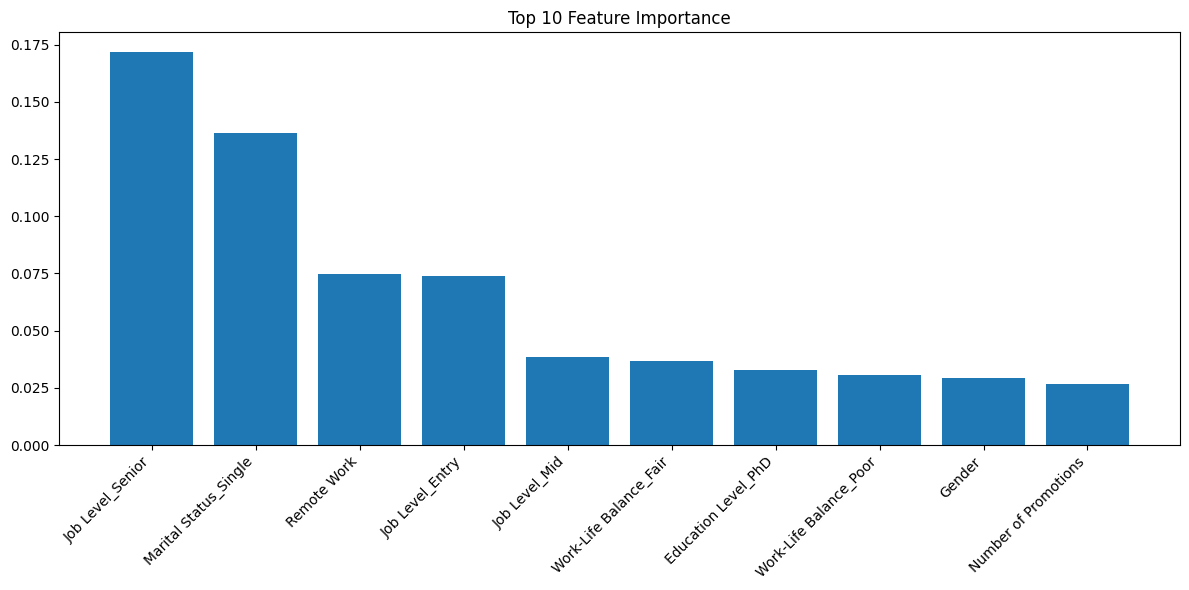

In [154]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [155]:
# Load data after feature engineering
train_df = pd.read_csv("data/processed/train_engineered.csv")
val_df = pd.read_csv("data/processed/validation_engineered.csv")

# Separate features & target
X_train, y_train = train_df.drop(columns=["Attrition"]), train_df["Attrition"]
X_val, y_val = val_df.drop(columns=["Attrition"]), val_df["Attrition"]

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds, target_names=["Stayed", "Left"]))

/home/qinyaomou/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:14:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.7870872804193875
              precision    recall  f1-score   support

      Stayed       0.80      0.79      0.80      5681
        Left       0.78      0.78      0.78      5192

    accuracy                           0.79     10873
   macro avg       0.79      0.79      0.79     10873
weighted avg       0.79      0.79      0.79     10873



Top 10 Most Important Features:
                    feature  importance
50         Job Level_Senior    0.165790
47    Marital Status_Single    0.131793
8               Remote Work    0.074397
48          Job Level_Entry    0.062609
21  Work_Life_Balance_Level    0.050594
49            Job Level_Mid    0.037454
44      Education Level_PhD    0.033547
4      Number of Promotions    0.029924
1                    Gender    0.028621
7      Number of Dependents    0.028441


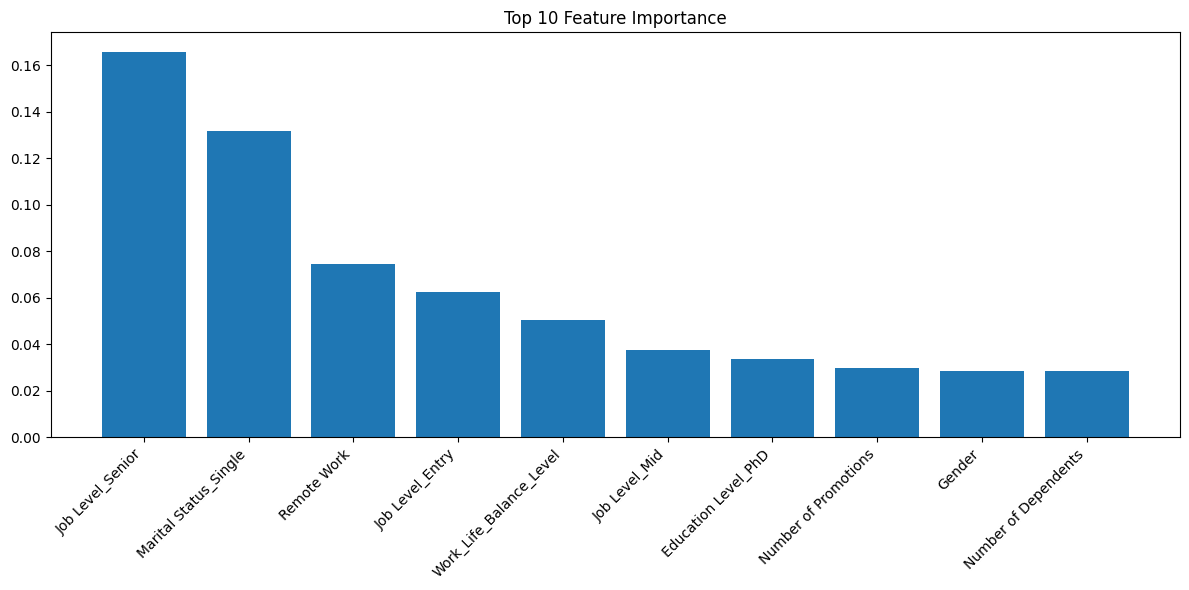

In [156]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()


=== Processing senior segment ===
Segment size - Train: 10940, Val: 2252

Results for senior segment:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1780
           1       0.72      0.41      0.52       472

    accuracy                           0.84      2252
   macro avg       0.79      0.68      0.72      2252
weighted avg       0.83      0.84      0.83      2252


Top 5 Important Features:
                    feature  importance
47    Marital Status_Single    0.139596
8               Remote Work    0.092119
21  Work_Life_Balance_Level    0.067412
1                    Gender    0.044730
44      Education Level_PhD    0.038793

=== Processing entry segment ===
Segment size - Train: 21816, Val: 4321

Results for entry segment:

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.64      1579
           1       0.78      0.87      0.82  

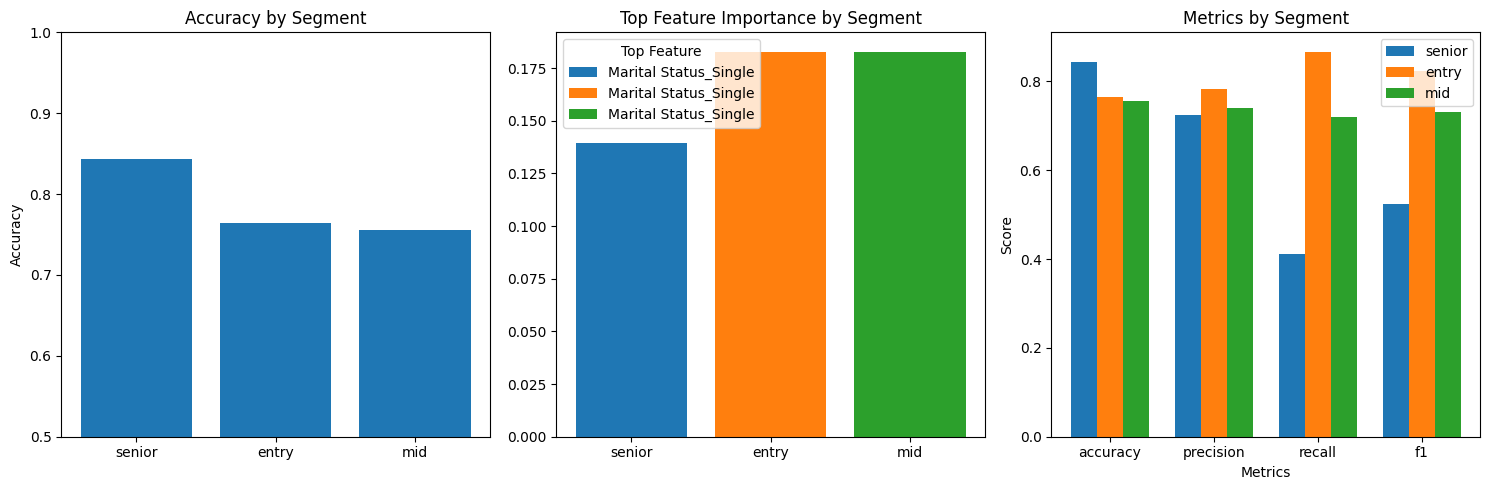


=== Overall Summary ===

senior segment:
accuracy: 0.844
precision: 0.724
recall: 0.411
f1: 0.524

entry segment:
accuracy: 0.764
precision: 0.784
recall: 0.867
f1: 0.824

mid segment:
accuracy: 0.756
precision: 0.741
recall: 0.720
f1: 0.731


In [157]:
def train_segmented_xgboost(X_train, y_train, X_val, y_val):
    """
    Train separate XGBoost models for different job level segments
    
    Parameters:
    X_train, y_train: Training data
    X_val, y_val: Validation data
    
    Returns:
    Dictionary containing models and results for each segment
    """
    # Define segments
    segments = {
        'senior': (X_train['Job Level_Senior'] == 1, X_val['Job Level_Senior'] == 1),
        'entry': (X_train['Job Level_Entry'] == 1, X_val['Job Level_Entry'] == 1),
        'mid': (X_train['Job Level_Mid'] == 1, X_val['Job Level_Mid'] == 1)
    }
    
    segment_models = {}
    segment_results = {}
    
    for segment_name, (train_mask, val_mask) in segments.items():
        print(f"\n=== Processing {segment_name} segment ===")
        
        # Get segment data
        X_train_segment = X_train[train_mask]
        y_train_segment = y_train[train_mask]
        X_val_segment = X_val[val_mask]
        y_val_segment = y_val[val_mask]
        
        print(f"Segment size - Train: {len(X_train_segment)}, Val: {len(X_val_segment)}")
        
        # Train XGBoost model for segment
        model = xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        # Fit model
        model.fit(X_train_segment, y_train_segment)
        
        # Make predictions
        y_pred = model.predict(X_val_segment)
        
        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_val_segment, y_pred),
            'precision': precision_score(y_val_segment, y_pred),
            'recall': recall_score(y_val_segment, y_pred),
            'f1': f1_score(y_val_segment, y_pred)
        }
        
        # Get feature importance
        feature_imp = pd.DataFrame({
            'feature': X_train_segment.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Store results
        segment_models[segment_name] = model
        segment_results[segment_name] = {
            'metrics': metrics,
            'feature_importance': feature_imp,
            'predictions': y_pred,
            'actual': y_val_segment
        }
        
        # Print results
        print(f"\nResults for {segment_name} segment:")
        print("\nClassification Report:")
        print(classification_report(y_val_segment, y_pred))
        
        print("\nTop 5 Important Features:")
        print(feature_imp.head())
    
    # Visualize results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Accuracy by segment
    plt.subplot(1, 3, 1)
    accuracies = [results['metrics']['accuracy'] 
                  for results in segment_results.values()]
    plt.bar(segment_results.keys(), accuracies)
    plt.title('Accuracy by Segment')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.0)
    
    # Plot 2: Feature Importance Comparison
    plt.subplot(1, 3, 2)
    for segment_name, results in segment_results.items():
        top_feature = results['feature_importance'].iloc[0]
        plt.bar(segment_name, top_feature['importance'], 
                label=top_feature['feature'])
    plt.title('Top Feature Importance by Segment')
    plt.legend(title='Top Feature')
    
    # Plot 3: Metrics Comparison
    plt.subplot(1, 3, 3)
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    x = np.arange(len(metrics))
    width = 0.25
    
    for i, (segment_name, results) in enumerate(segment_results.items()):
        values = [results['metrics'][m] for m in metrics]
        plt.bar(x + i*width, values, width, label=segment_name)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Metrics by Segment')
    plt.xticks(x + width, metrics)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'models': segment_models,
        'results': segment_results
    }

# Run the segmented analysis
segmented_results = train_segmented_xgboost(X_train, y_train, X_val, y_val)

# Print overall summary
print("\n=== Overall Summary ===")
for segment_name, results in segmented_results['results'].items():
    print(f"\n{segment_name} segment:")
    for metric, value in results['metrics'].items():
        print(f"{metric}: {value:.3f}")


=== Error Analysis for senior ===

Characteristics of misclassified cases:

Remote Work:
Misclassified distribution:
Remote Work
0    0.960227
1    0.039773
Name: proportion, dtype: float64

Correct distribution:
Remote Work
0    0.779474
1    0.220526
Name: proportion, dtype: float64

Marital Status_Single:
Misclassified distribution:
Marital Status_Single
1.0    0.545455
0.0    0.454545
Name: proportion, dtype: float64

Correct distribution:
Marital Status_Single
0.0    0.68
1.0    0.32
Name: proportion, dtype: float64

Work-Life Balance_Poor:
Misclassified distribution:
Work-Life Balance_Poor
0.0    0.815341
1.0    0.184659
Name: proportion, dtype: float64

Correct distribution:
Work-Life Balance_Poor
0.0    0.871579
1.0    0.128421
Name: proportion, dtype: float64

Prediction Confidence Analysis:
Average confidence when correct: 0.855
Average confidence when wrong: 0.665

=== Error Analysis for entry ===

Characteristics of misclassified cases:

Remote Work:
Misclassified distribu

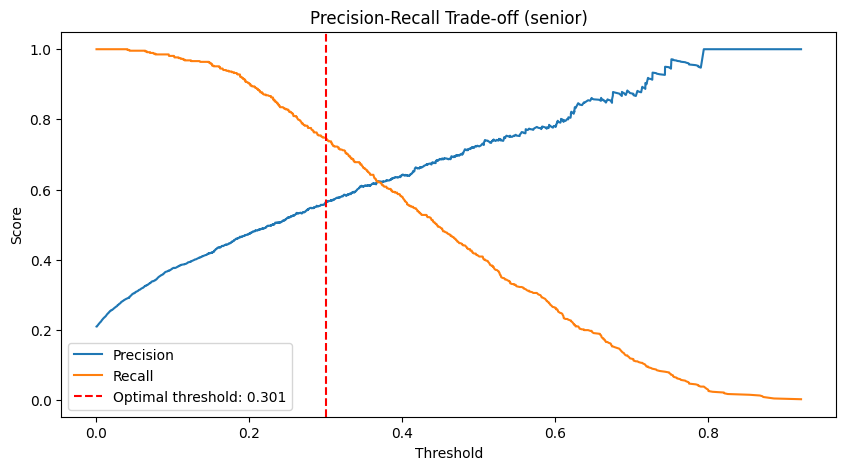


entry optimal threshold: 0.447

Results with optimal threshold:
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      1579
           1       0.76      0.91      0.83      2742

    accuracy                           0.77      4321
   macro avg       0.77      0.71      0.72      4321
weighted avg       0.77      0.77      0.75      4321



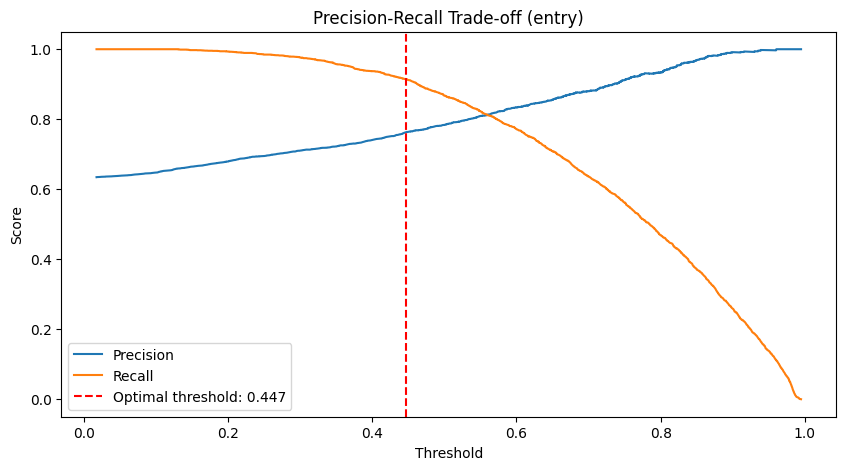


mid optimal threshold: 0.419

Results with optimal threshold:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      2322
           1       0.70      0.82      0.75      1978

    accuracy                           0.76      4300
   macro avg       0.76      0.76      0.76      4300
weighted avg       0.76      0.76      0.76      4300



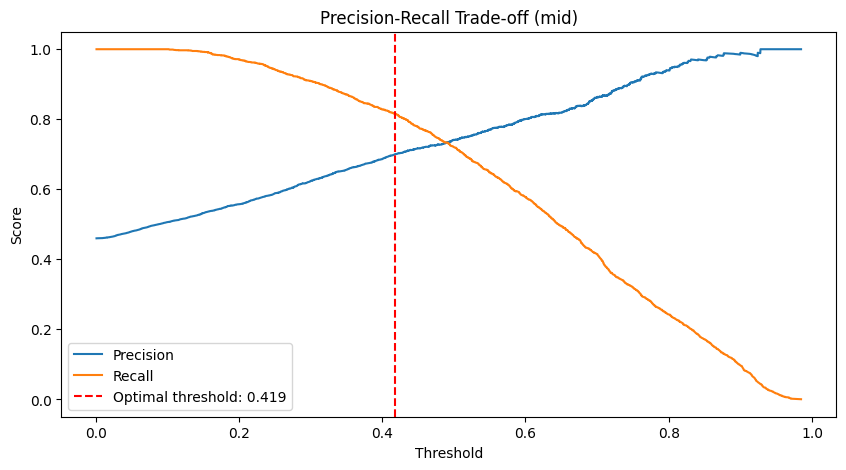

In [158]:
def perform_deep_analysis(X_train, y_train, X_val, y_val, segment_models, segment_results):
    """
    Detailed analysis of model performance and patterns
    
    Parameters:
    X_train, y_train: Training data
    X_val, y_val: Validation data
    segment_models: Dictionary of trained models for each segment
    segment_results: Dictionary of results for each segment
    """
    
    # 1. Error Analysis
    for segment_name, model in segment_models.items():
        print(f"\n=== Error Analysis for {segment_name} ===")
        
        # Get segment data
        segment_mask = X_val['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_val_segment = X_val[segment_mask]
        y_val_segment = y_val[segment_mask]
        
        # Get predictions
        y_pred = model.predict(X_val_segment)
        y_pred_proba = model.predict_proba(X_val_segment)
        
        # Analyze misclassified cases
        misclassified = X_val_segment[y_pred != y_val_segment]
        correct = X_val_segment[y_pred == y_val_segment]
        
        print("\nCharacteristics of misclassified cases:")
        for col in ['Remote Work', 'Marital Status_Single', 'Work-Life Balance_Poor']:
            if col in misclassified.columns:
                print(f"\n{col}:")
                print("Misclassified distribution:")
                print(misclassified[col].value_counts(normalize=True))
                print("\nCorrect distribution:")
                print(correct[col].value_counts(normalize=True))
        
        # Analyze prediction confidence
        print("\nPrediction Confidence Analysis:")
        confident_correct = np.max(y_pred_proba[y_pred == y_val_segment], axis=1)
        confident_wrong = np.max(y_pred_proba[y_pred != y_val_segment], axis=1)
        print(f"Average confidence when correct: {confident_correct.mean():.3f}")
        print(f"Average confidence when wrong: {confident_wrong.mean():.3f}")
    
    # 2. Feature Interaction Analysis
    print("\n=== Feature Interaction Analysis ===")
    for segment_name, model in segment_models.items():
        print(f"\n{segment_name} key interactions:")
        
        # Get top features
        top_features = segment_results[segment_name]['feature_importance']['feature'].head(3).tolist()
        
        # Analyze interactions between top features
        for i in range(len(top_features)):
            for j in range(i+1, len(top_features)):
                if top_features[i] in X_train.columns and top_features[j] in X_train.columns:
                    interaction_df = pd.DataFrame({
                        'feature1': X_train[top_features[i]],
                        'feature2': X_train[top_features[j]],
                        'target': y_train
                    })
                    print(f"\nInteraction between {top_features[i]} and {top_features[j]}:")
                    print(interaction_df.groupby(['feature1', 'feature2'])['target'].mean())
    
    # 3. Threshold Analysis
    print("\n=== Threshold Optimization ===")
    
    for segment_name, model in segment_models.items():
        segment_mask = X_val['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_val_segment = X_val[segment_mask]
        y_val_segment = y_val[segment_mask]
        
        y_pred_proba = model.predict_proba(X_val_segment)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_val_segment, y_pred_proba)
        
        # Find optimal threshold
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
        optimal_threshold = thresholds[np.argmax(f1_scores[:-1])]
        
        print(f"\n{segment_name} optimal threshold: {optimal_threshold:.3f}")
        
        # Compare results with optimal threshold
        y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
        print("\nResults with optimal threshold:")
        print(classification_report(y_val_segment, y_pred_optimal))

        # Visualize threshold impact
        plt.figure(figsize=(10, 5))
        plt.plot(thresholds, precisions[:-1], label='Precision')
        plt.plot(thresholds, recalls[:-1], label='Recall')
        plt.axvline(x=optimal_threshold, color='r', linestyle='--', 
                   label=f'Optimal threshold: {optimal_threshold:.3f}')
        plt.title(f'Precision-Recall Trade-off ({segment_name})')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.legend()
        plt.show()

    return {
        'optimal_thresholds': optimal_threshold,
        'misclassification_analysis': {
            'correct_confidence': confident_correct,
            'wrong_confidence': confident_wrong
        }
    }

# Run deep analysis
analysis_results = perform_deep_analysis(X_train, y_train, X_val, y_val, 
                                       segmented_results['models'], 
                                       segmented_results['results'])

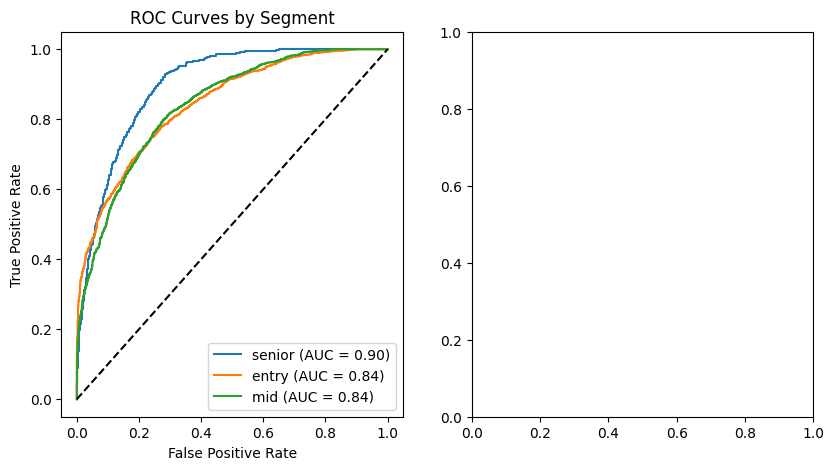

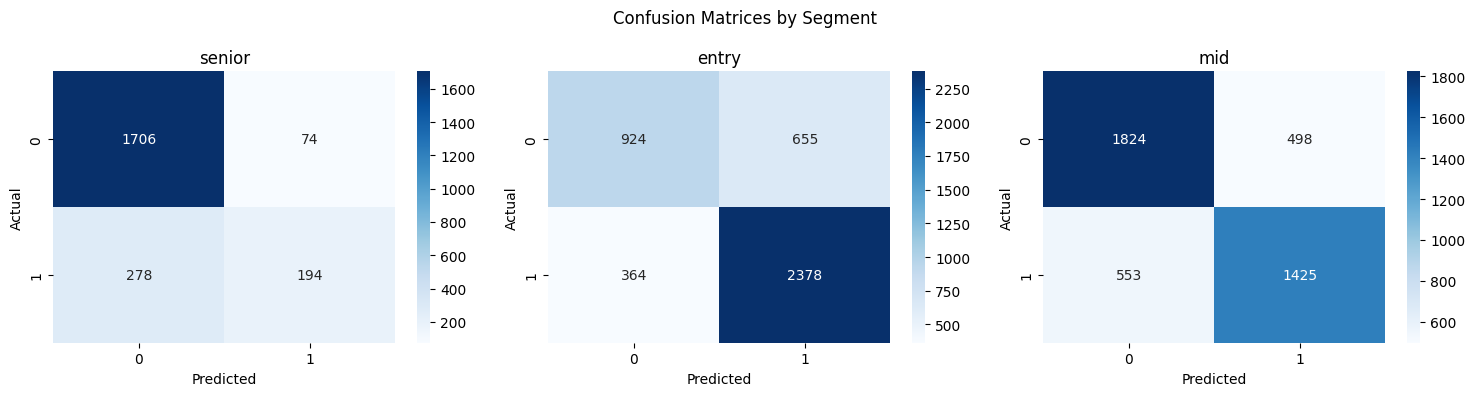

<Figure size 1200x600 with 0 Axes>

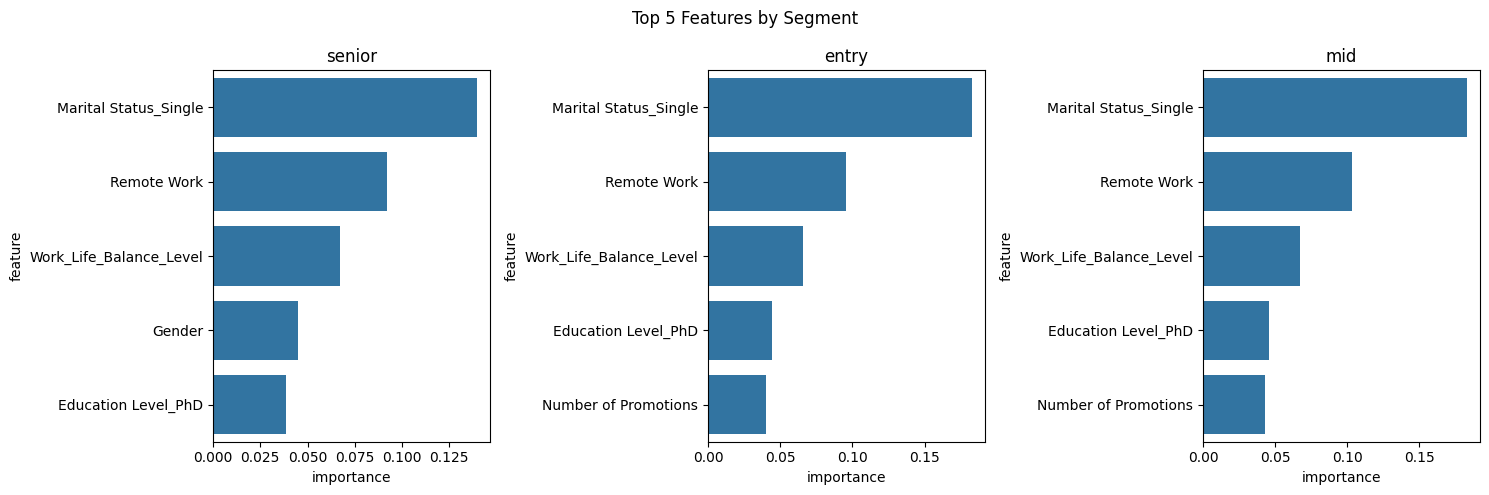

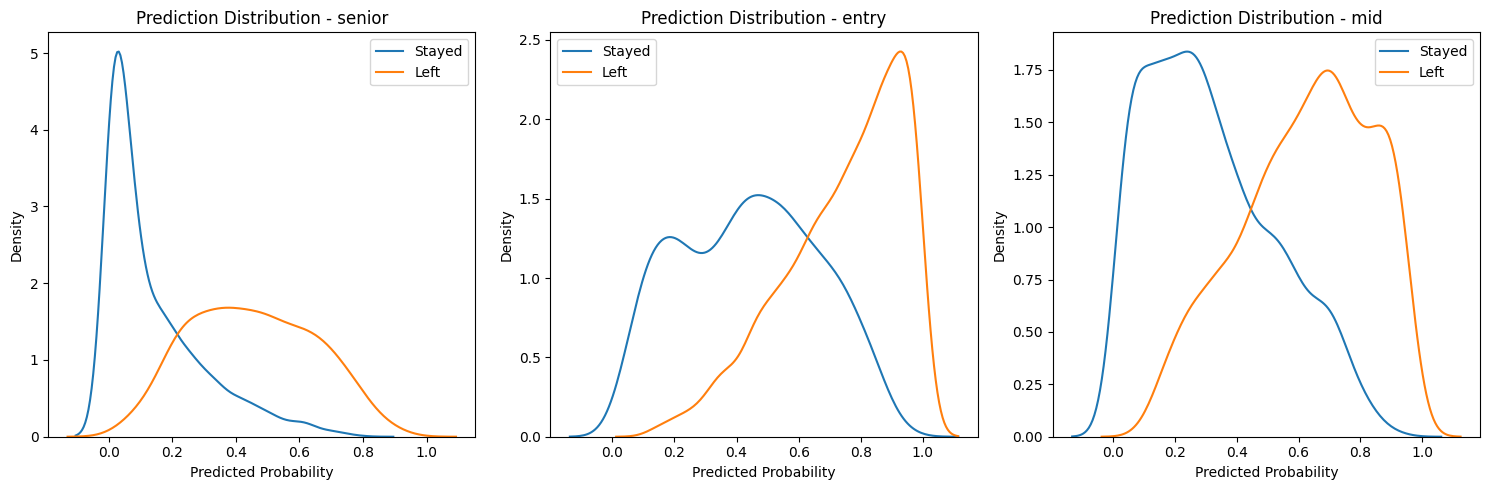

<Figure size 1000x600 with 0 Axes>

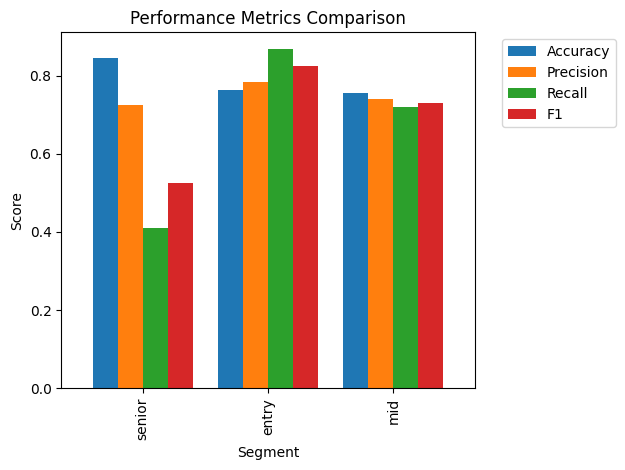

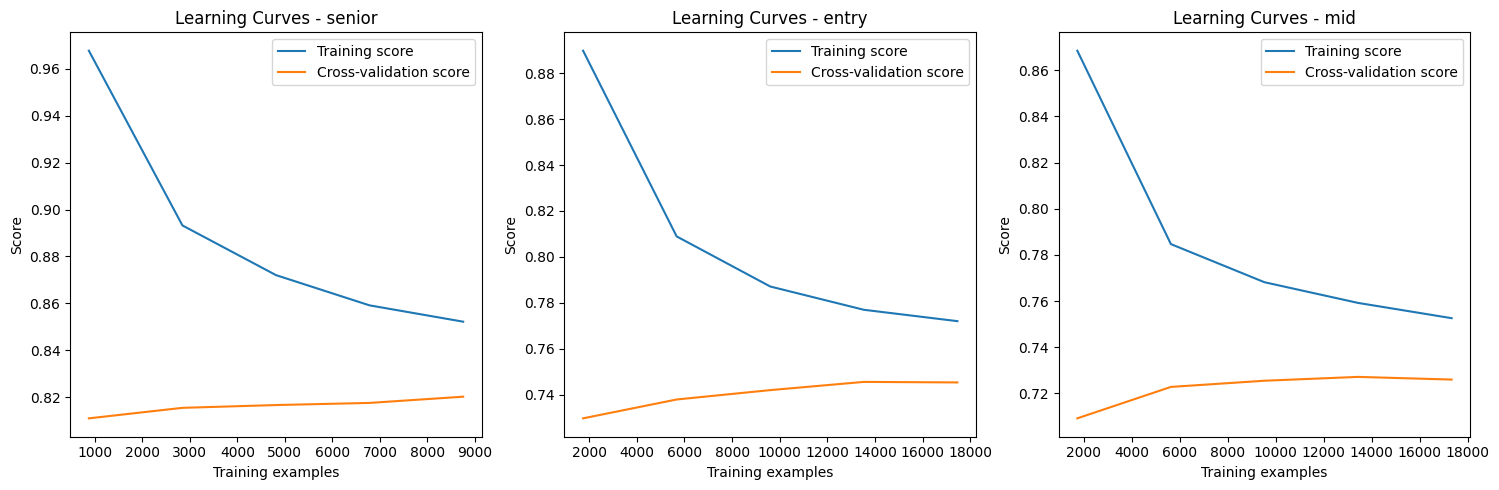

In [159]:
def create_model_visualizations(X_train, y_train, X_val, y_val, segment_models, segment_results):
    """
    Create comprehensive visualizations for model analysis
    """
    
    # 1. ROC Curves
    plt.figure(figsize=(15, 5))
    
    # Plot ROC for each segment
    plt.subplot(1, 3, 1)
    for segment_name, model in segment_models.items():
        segment_mask = X_val['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_val_segment = X_val[segment_mask]
        y_val_segment = y_val[segment_mask]
        
        y_pred_proba = model.predict_proba(X_val_segment)[:, 1]
        fpr, tpr, _ = roc_curve(y_val_segment, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{segment_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves by Segment')
    plt.legend()
    
    # 2. Confusion Matrices
    plt.subplot(1, 3, 2)
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Confusion Matrices by Segment')
    
    for i, (segment_name, model) in enumerate(segment_models.items()):
        segment_mask = X_val['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_val_segment = X_val[segment_mask]
        y_val_segment = y_val[segment_mask]
        
        y_pred = model.predict(X_val_segment)
        cm = confusion_matrix(y_val_segment, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
        axes[i].set_title(f'{segment_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    
    # 3. Feature Importance Comparison
    plt.figure(figsize=(12, 6))
    
    # Get top 5 features for each segment
    top_features = {}
    for segment_name, results in segment_results.items():
        top_features[segment_name] = results['feature_importance'].head(5)
    
    # Plot feature importance
    n_segments = len(segment_models)
    fig, axes = plt.subplots(1, n_segments, figsize=(15, 5))
    fig.suptitle('Top 5 Features by Segment')
    
    for i, (segment_name, features) in enumerate(top_features.items()):
        sns.barplot(x='importance', y='feature', data=features, ax=axes[i])
        axes[i].set_title(segment_name)
    
    plt.tight_layout()
    
    # 4. Prediction Distribution
    plt.figure(figsize=(15, 5))
    
    for i, (segment_name, model) in enumerate(segment_models.items()):
        plt.subplot(1, 3, i+1)
        segment_mask = X_val['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_val_segment = X_val[segment_mask]
        y_val_segment = y_val[segment_mask]
        
        y_pred_proba = model.predict_proba(X_val_segment)[:, 1]
        
        # Plot distribution for each class
        for label in [0, 1]:
            sns.kdeplot(y_pred_proba[y_val_segment == label], 
                       label=f'Class {label}')
        
        plt.title(f'Prediction Distribution - {segment_name}')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Density')
        plt.legend(['Stayed', 'Left'])
    
    plt.tight_layout()
    
    # 5. Performance Metrics Comparison
    metrics_df = pd.DataFrame([
        {
            'Segment': segment_name,
            'Accuracy': results['metrics']['accuracy'],
            'Precision': results['metrics']['precision'],
            'Recall': results['metrics']['recall'],
            'F1': results['metrics']['f1']
        }
        for segment_name, results in segment_results.items()
    ])
    
    plt.figure(figsize=(10, 6))
    metrics_df.set_index('Segment').plot(kind='bar', width=0.8)
    plt.title('Performance Metrics Comparison')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    # 6. Learning Curves
    
    plt.figure(figsize=(15, 5))
    for i, (segment_name, model) in enumerate(segment_models.items()):
        plt.subplot(1, 3, i+1)
        segment_mask = X_train['Job Level_' + segment_name.split('_')[0].capitalize()] == 1
        X_train_segment = X_train[segment_mask]
        y_train_segment = y_train[segment_mask]
        
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train_segment, y_train_segment,
            cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
        
        plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
        plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Cross-validation score')
        plt.title(f'Learning Curves - {segment_name}')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.legend(loc='best')
    
    plt.tight_layout()
    
    return {
        'metrics_comparison': metrics_df,
        'top_features': top_features
    }

# Run visualizations
visualization_results = create_model_visualizations(
    X_train, y_train, X_val, y_val,
    segmented_results['models'],
    segmented_results['results']
)

In [160]:
def create_interaction_features(X):
    """Create interaction features for key predictors"""
    X = X.copy()
    
    # Remote Work interactions
    if 'Remote Work' in X.columns:
        X['Remote_WLB'] = X['Remote Work'] * X['Work_Life_Balance_Level']
        X['Remote_Stress'] = X['Remote Work'] * X['Stress_Index']
    
    # Marital Status interactions
    for status in ['Single', 'Married', 'Divorced']:
        col = f'Marital Status_{status}'
        if col in X.columns:
            X[f'{col}_WLB'] = X[col] * X['Work_Life_Balance_Level']
            X[f'{col}_Stress'] = X[col] * X['Stress_Index']
    
    # Performance interactions
    if 'Performance Rating_High' in X.columns:
        X['Performance_WLB'] = X['Performance Rating_High'] * X['Work_Life_Balance_Level']
        X['Performance_Stress'] = X['Performance Rating_High'] * X['Stress_Index']
    
    # Tenure interactions
    if 'Years at Company' in X.columns:
        X['Tenure_WLB'] = X['Years at Company'] * X['Work_Life_Balance_Level']
        X['Tenure_Stress'] = X['Years at Company'] * X['Stress_Index']
        if 'Performance Rating_High' in X.columns:
            X['Tenure_Performance'] = X['Years at Company'] * X['Performance Rating_High']
    
    return X

def create_subsegments(X, y, level_col):
    """Create meaningful subsegments based on key characteristics"""
    subsegments = {}
    remote_mask = X['Remote Work'] == 1
    non_remote_mask = X['Remote Work'] == 0
    high_performer_mask = X['Performance Rating_High'] == 1
    low_performer_mask = X['Performance Rating_Below Average'] == 1
    good_wlb_mask = (X['Work-Life Balance_Good'] == 1) | (X['Work-Life Balance_Excellent'] == 1)
    poor_wlb_mask = (X['Work-Life Balance_Poor'] == 1) | (X['Work-Life Balance_Fair'] == 1)
    
    if level_col == 'Job Level_Entry':
        new_hire_mask = X['Years at Company'] <= 1
        established_mask = X['Years at Company'] > 1
        subsegments = {
            'new_remote': remote_mask & new_hire_mask,
            'new_non_remote': non_remote_mask & new_hire_mask,
            'established_remote': remote_mask & established_mask,
            'established_non_remote': non_remote_mask & established_mask,
            'high_performer': high_performer_mask,
            'low_performer': low_performer_mask
        }
    elif level_col == 'Job Level_Mid':
        subsegments = {
            'remote_good_wlb': remote_mask & good_wlb_mask,
            'remote_poor_wlb': remote_mask & poor_wlb_mask,
            'non_remote_good_wlb': non_remote_mask & good_wlb_mask,
            'non_remote_poor_wlb': non_remote_mask & poor_wlb_mask,
            'high_performer': high_performer_mask,
            'low_performer': low_performer_mask
        }
    else:  # Senior level
        long_tenure_mask = X['Years at Company'] > 5
        subsegments = {
            'senior_remote': remote_mask,
            'senior_non_remote': non_remote_mask,
            'long_tenure': long_tenure_mask,
            'high_performer': high_performer_mask,
            'good_wlb': good_wlb_mask,
            'poor_wlb': poor_wlb_mask
        }
    
    return subsegments

def balance_segment(X, y, min_samples=100, max_samples=8000):
    """Balance segment using SMOTE or undersampling with error handling"""
    # Check class distribution using numpy
    unique_classes, class_counts = np.unique(y, return_counts=True)
    if len(unique_classes) < 2:
        print("Warning: Only one class present in segment, skipping balancing")
        return X, y
        
    minority_count = np.min(class_counts)
    majority_count = np.max(class_counts)
    
    if len(X) < min_samples:
        try:
            # For small segments, use SMOTE with adjusted ratio
            print(f"Applying SMOTE to balance small segment (size: {len(X)})")
            strategy = max(0.5, minority_count / majority_count)
            sampler = SMOTE(sampling_strategy=strategy, 
                          random_state=42, 
                          k_neighbors=min(3, minority_count-1))
            X_resampled, y_resampled = sampler.fit_resample(X, y)
        except ValueError as e:
            print(f"Warning: SMOTE failed, keeping original data. Error: {str(e)}")
            return X, y
            
    elif len(X) > max_samples:
        try:
            # For large segments, use undersampling
            print(f"Applying undersampling to large segment (size: {len(X)})")
            strategy = max(0.3, minority_count / majority_count)
            under = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
            X_resampled, y_resampled = under.fit_resample(X, y)
        except ValueError as e:
            print(f"Warning: Undersampling failed, keeping original data. Error: {str(e)}")
            return X, y
    else:
        # For medium-sized segments, keep original
        return X, y
    
    print(f"Balanced subsegment size: {len(X_resampled)}")
    return X_resampled, y_resampled

def analyze_model_performance(X, y, subseg_name):
    """Analyze model performance with cross-validation and overfitting detection"""
    print(f"\nAnalyzing model performance for {subseg_name}")
    
    # Check class distribution
    unique_classes = np.unique(y)
    if len(unique_classes) < 2:
        print(f"Warning: Only class {unique_classes[0]} present in segment")
        return {
            'params': get_default_params(len(X)),
            'cv_scores': np.array([]),
            'train_scores': np.array([]),
            'val_scores': np.array([]),
            'train_sizes': np.array([]),
            'score_diff': 0
        }
    
    initial_params = get_default_params(len(X))
    model = xgb.XGBClassifier(**initial_params)
    
    try:
        # Perform cross-validation with accuracy instead of F1
        cv_scores = cross_val_score(
            model, X, y,
            cv=min(5, len(unique_classes) * 2),  # Adjust CV folds based on class count
            scoring='accuracy',
            error_score='raise'
        )
        
        # Generate learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.3, 1.0, 4),  # Adjust train sizes
            cv=min(5, len(unique_classes) * 2),
            scoring='accuracy',
            error_score='raise'
        )
        
        # Calculate mean scores
        train_mean = np.mean(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        score_diff = train_mean[-1] - val_mean[-1]
        
        print(f"\nCross-validation accuracy score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        print(f"Train-validation gap: {score_diff:.4f}")
        
        # Adjust parameters if overfitting detected
        if score_diff > 0.1:
            print("\nOverfitting detected. Adjusting parameters...")
            initial_params.update({
                'n_estimators': 50,
                'learning_rate': 0.05,
                'max_depth': 3,
                'min_child_weight': 3,
                'subsample': 0.7,
                'colsample_bytree': 0.7,
                'reg_alpha': 0.1,
                'reg_lambda': 2,
                'gamma': 0.1
            })
            print("Parameters adjusted to reduce overfitting")
        
    except Exception as e:
        print(f"Warning: Error during performance analysis: {str(e)}")
        print("Using default parameters")
        return {
            'params': initial_params,
            'cv_scores': np.array([]),
            'train_scores': np.array([]),
            'val_scores': np.array([]),
            'train_sizes': np.array([]),
            'score_diff': 0
        }
    
    return {
        'params': initial_params,
        'cv_scores': cv_scores,
        'train_scores': train_scores,
        'val_scores': val_scores,
        'train_sizes': train_sizes,
        'score_diff': score_diff
    }

def fine_tune_model(X, y, initial_params=None):
    """Fine-tune model using GridSearchCV with robust error handling"""
    print("\nPerforming model fine-tuning...")
    
    # Check class distribution
    unique_classes = np.unique(y)
    if len(unique_classes) < 2:
        print(f"Warning: Only class {unique_classes[0]} present in segment")
        return get_default_params(len(X))
    
    if initial_params is None:
        initial_params = get_default_params(len(X))
    
    # Define parameter grid based on segment size
    if len(X) < 200:
        param_grid = {
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'n_estimators': [50, 75],
            'min_child_weight': [1, 2],
            'subsample': [0.7, 0.8],
            'colsample_bytree': [0.7, 0.8]
        }
    else:
        param_grid = {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [75, 100, 125],
            'min_child_weight': [1, 2, 3],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [1, 1.5, 2]
        }

    try:
        # Create base model
        base_model = xgb.XGBClassifier(
            objective='binary:logistic',
            base_score=0.5,
            random_state=42,
            **initial_params
        )

        # Setup GridSearchCV with accuracy scoring
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            cv=min(5, len(unique_classes) * 2),
            scoring='accuracy',  # Changed from f1 to accuracy
            n_jobs=-1,
            verbose=1,
            error_score='raise'
        )

        # Fit GridSearchCV
        grid_search.fit(X, y)

        print("\nBest parameters found:")
        for param, value in grid_search.best_params_.items():
            print(f"{param}: {value}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")

        return grid_search.best_params_

    except Exception as e:
        print(f"Warning: Error during fine-tuning: {str(e)}")
        print("Using initial parameters")
        return initial_params

def analyze_and_train_subsegments(X_train, y_train, X_val, y_val, stage='initial'):
    """
    Refactored main function that can be used for initial training, fine-tuning, or final assessment
    """
    results = {}
    
    for level in ['Entry', 'Mid', 'Senior']:
        print(f"\n{'='*50}")
        print(f"{stage.title()} Analysis for {level} Level")
        print(f"{'='*50}")
        
        level_col = f'Job Level_{level}'
        train_mask = X_train[level_col] == 1
        val_mask = X_val[level_col] == 1
        
        X_train_level = X_train[train_mask]
        y_train_level = y_train[train_mask]
        X_val_level = X_val[val_mask]
        y_val_level = y_val[val_mask]
        
        print("\nAdding interaction features...")
        X_train_level = create_interaction_features(X_train_level)
        X_val_level = create_interaction_features(X_val_level)
        
        print(f"\nSegment size: {len(X_train_level)} training, {len(X_val_level)} validation")
        
        subsegments = create_subsegments(X_train_level, y_train_level, level_col)
        subsegment_results = {}
        
        for subseg_name, subseg_mask in subsegments.items():
            print(f"\nProcessing {level} - {subseg_name}")
            
            X_train_subseg = X_train_level[subseg_mask]
            y_train_subseg = y_train_level[subseg_mask]
            
            if len(X_train_subseg) < 50:
                print(f"Skipping {subseg_name} (insufficient samples)")
                continue
                
            print(f"Original subsegment size: {len(X_train_subseg)} ({len(X_train_subseg)/len(X_train_level):.1%} of segment)")
            
            # Balance the segment
            X_train_subseg, y_train_subseg = balance_segment(X_train_subseg, y_train_subseg)
            
            val_subseg_mask = create_subsegments(X_val_level, y_val_level, level_col)[subseg_name]
            X_val_subseg = X_val_level[val_subseg_mask]
            y_val_subseg = y_val_level[val_subseg_mask]
            
            try:
                if stage == 'initial':
                    # Initial training with cross-validation
                    performance_metrics = analyze_model_performance(X_train_subseg, y_train_subseg, f"{level}-{subseg_name}")
                    model_params = performance_metrics['params']
                
                elif stage == 'fine_tune':
                    # Fine-tuning with GridSearchCV
                    model_params = fine_tune_model(X_train_subseg, y_train_subseg)
                
                else:  # final assessment
                    # Use existing parameters from fine-tuned model
                    model_params = subseg_mask.get('best_params', None)
                    if model_params is None:
                        print("Warning: No fine-tuned parameters found, using default")
                        model_params = get_default_params(len(X_train_subseg))
                
                # Simple model training without early stopping
                model = xgb.XGBClassifier(**model_params)
                model.fit(X_train_subseg, y_train_subseg)
                
                # Make predictions
                y_pred = model.predict(X_val_subseg)
                y_prob = model.predict_proba(X_val_subseg)[:, 1]
                
                # Calculate metrics
                metrics = {
                    'accuracy': accuracy_score(y_val_subseg, y_pred),
                    'precision': precision_score(y_val_subseg, y_pred),
                    'recall': recall_score(y_val_subseg, y_pred),
                    'f1': f1_score(y_val_subseg, y_pred),
                    'roc_auc': roc_auc_score(y_val_subseg, y_prob)
                }
                
                # Get feature importance
                feature_imp = pd.DataFrame({
                    'feature': X_train_subseg.columns,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                print("\nMetrics:")
                for metric_name, value in metrics.items():
                    print(f"{metric_name}: {value:.4f}")
                
                print("\nTop 5 important features:")
                print(feature_imp.head())
                
                subsegment_results[subseg_name] = {
                    'model': model,
                    'metrics': metrics,
                    'feature_importance': feature_imp,
                    'size': len(X_train_subseg),
                    'parameters': model_params
                }
                
            except Exception as e:
                print(f"Error in {subseg_name}: {str(e)}")
                continue
        
        results[level] = subsegment_results
    
    return results


def get_default_params(segment_size):
    """Get default model parameters based on segment size"""
    return {
        'n_estimators': 100,
        'learning_rate': 0.1,
        'max_depth': 4 if segment_size > 200 else 3,
        'min_child_weight': 2,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'binary:logistic',
        'base_score': 0.5,
        'random_state': 42
    }

# Complete pipeline with all three steps:
def run_complete_analysis(X_train, y_train, X_val, y_val, X_test, y_test):
    """Run complete analysis pipeline including initial training, fine-tuning, and final assessment"""
    
    # Step 1: Initial Training
    print("\nStep 1: Initial Training")
    print("="*50)
    initial_results = analyze_and_train_subsegments(X_train, y_train, X_val, y_val, stage='initial')
    
    # Step 2: Fine-tuning
    print("\nStep 2: Fine-tuning")
    print("="*50)
    fine_tuned_results = analyze_and_train_subsegments(X_train, y_train, X_val, y_val, stage='fine_tune')
    
    # Step 3: Final Assessment
    print("\nStep 3: Final Assessment")
    print("="*50)
    final_results = analyze_and_train_subsegments(X_test, y_test, X_val, y_val, stage='final')
    
    # Compare results across stages
    print("\nPerformance Comparison Across Stages:")
    print("="*50)
    
    for level in ['Entry', 'Mid', 'Senior']:
        print(f"\n{level} Level Results:")
        print("-"*30)
        
        for stage, results in [('Initial', initial_results), 
                             ('Fine-tuned', fine_tuned_results), 
                             ('Final', final_results)]:
            if level in results:
                print(f"\n{stage} Stage:")
                for subseg_name, subseg_data in results[level].items():
                    print(f"\n{subseg_name}:")
                    for metric_name, value in subseg_data['metrics'].items():
                        print(f"{metric_name}: {value:.4f}")
    
    return {
        'initial': initial_results,
        'fine_tuned': fine_tuned_results,
        'final': final_results
    }

results = run_complete_analysis(X_train, y_train, X_val, y_val, X_test, y_test)

# Access results for each stage:
initial_results = results['initial']
fine_tuned_results = results['fine_tuned']
final_results = results['final']

# You can also run individual stages if needed:
# For initial training only:
initial_results = analyze_and_train_subsegments(X_train, y_train, X_val, y_val, stage='initial')



Step 1: Initial Training

Initial Analysis for Entry Level

Adding interaction features...

Segment size: 21816 training, 4321 validation

Processing Entry - new_remote
Original subsegment size: 69 (0.3% of segment)
Applying SMOTE to balance small segment (size: 69)

Analyzing model performance for Entry-new_remote

Cross-validation accuracy score: 0.6642 (±0.1305)
Train-validation gap: 0.2623

Overfitting detected. Adjusting parameters...
Parameters adjusted to reduce overfitting

Metrics:
accuracy: 0.7857
precision: 0.7500
recall: 0.6000
f1: 0.6667
roc_auc: 0.8000

Top 5 important features:
                         feature  importance
47         Marital Status_Single    0.092487
71  Marital Status_Single_Stress    0.083880
46        Marital Status_Married    0.075354
70     Marital Status_Single_WLB    0.072188
80            Tenure_Performance    0.059314

Processing Entry - new_non_remote
Original subsegment size: 252 (1.2% of segment)

Analyzing model performance for Entry-new_non

In [161]:
# For fine-tuning only:
fine_tuned_results = analyze_and_train_subsegments(X_train, y_train, X_val, y_val, stage='fine_tune')



Fine_Tune Analysis for Entry Level

Adding interaction features...

Segment size: 21816 training, 4321 validation

Processing Entry - new_remote
Original subsegment size: 69 (0.3% of segment)
Applying SMOTE to balance small segment (size: 69)

Performing model fine-tuning...
Using initial parameters

Metrics:
accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
roc_auc: 1.0000

Top 5 important features:
                            feature  importance
47            Marital Status_Single    0.076764
71     Marital Status_Single_Stress    0.062441
22               Income_vs_JobLevel    0.045522
43  Education Level_Master’s Degree    0.043128
46           Marital Status_Married    0.040469

Processing Entry - new_non_remote
Original subsegment size: 252 (1.2% of segment)

Performing model fine-tuning...
Using initial parameters

Metrics:
accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
roc_auc: 1.0000

Top 5 important features:
                    feature  importance
4

In [162]:
test_df = pd.read_csv("data/processed/test_engineered.csv")
X_test, y_test, = test_df.drop(columns=["Attrition"]), test_df["Attrition"]
        
# For final assessment only:
final_results = analyze_and_train_subsegments(X_test, y_test, X_val, y_val, stage='final')


Final Analysis for Entry Level

Adding interaction features...

Segment size: 5373 training, 4321 validation

Processing Entry - new_remote
Skipping new_remote (insufficient samples)

Processing Entry - new_non_remote
Original subsegment size: 61 (1.1% of segment)
Applying SMOTE to balance small segment (size: 61)
Balanced subsegment size: 72

Metrics:
accuracy: 0.6000
precision: 0.6429
recall: 0.7500
f1: 0.6923
roc_auc: 0.6146

Top 5 important features:
                            feature  importance
43  Education Level_Master’s Degree    0.118610
4              Number of Promotions    0.075089
72       Marital Status_Married_WLB    0.064250
30           Work-Life Balance_Good    0.050749
75   Marital Status_Divorced_Stress    0.045152

Processing Entry - established_remote
Original subsegment size: 997 (18.6% of segment)

Metrics:
accuracy: 0.7179
precision: 0.6211
recall: 0.5559
f1: 0.5867
roc_auc: 0.7562

Top 5 important features:
                         feature  importance
71  M

In [163]:
business_recommendations = {
    'senior_employees': [
        "Focus on work-life balance programs",
        "Maintain remote work options",
        "Consider marital status in retention strategies"
    ],
    'entry_level': [
        "Implement structured growth programs",
        "Enhance remote work opportunities",
        "Improve work-life balance initiatives"
    ],
    'mid_level': [
        "Balance work-life initiatives",
        "Provide clear career progression",
        "Flexible working arrangements"
    ]
}
print("\nBusiness Recommendations:")
for group, recs in business_recommendations.items():
    print(f"\n{group.replace('_', ' ').title()}:")
    for rec in recs:
        print(f"- {rec}")


Business Recommendations:

Senior Employees:
- Focus on work-life balance programs
- Maintain remote work options
- Consider marital status in retention strategies

Entry Level:
- Implement structured growth programs
- Enhance remote work opportunities
- Improve work-life balance initiatives

Mid Level:
- Balance work-life initiatives
- Provide clear career progression
- Flexible working arrangements



EXECUTIVE SUMMARY

Key Findings:

Entry Level:
- Average Accuracy: 0.772
- Best performing subsegment: new_remote
- Average improvement after fine-tuning: 0.137

Mid Level:
- Average Accuracy: 0.776
- Best performing subsegment: non_remote_poor_wlb
- Average improvement after fine-tuning: 0.055

Senior Level:
- Average Accuracy: 0.856
- Best performing subsegment: senior_remote
- Average improvement after fine-tuning: 0.052

PERFORMANCE SUMMARY TABLES

Average Metrics by Stage and Level:
                   Accuracy  Precision  Recall     F1  ROC AUC
Stage      Level                                              
final      Entry      0.704      0.713   0.773  0.740    0.745
           Mid        0.725      0.641   0.540  0.570    0.755
           Senior     0.830      0.512   0.277  0.357    0.801
fine_tuned Entry      0.872      0.871   0.896  0.882    0.925
           Mid        0.822      0.822   0.725  0.761    0.901
           Senior     0.873      0.797   0.477  0.594    0.925
in

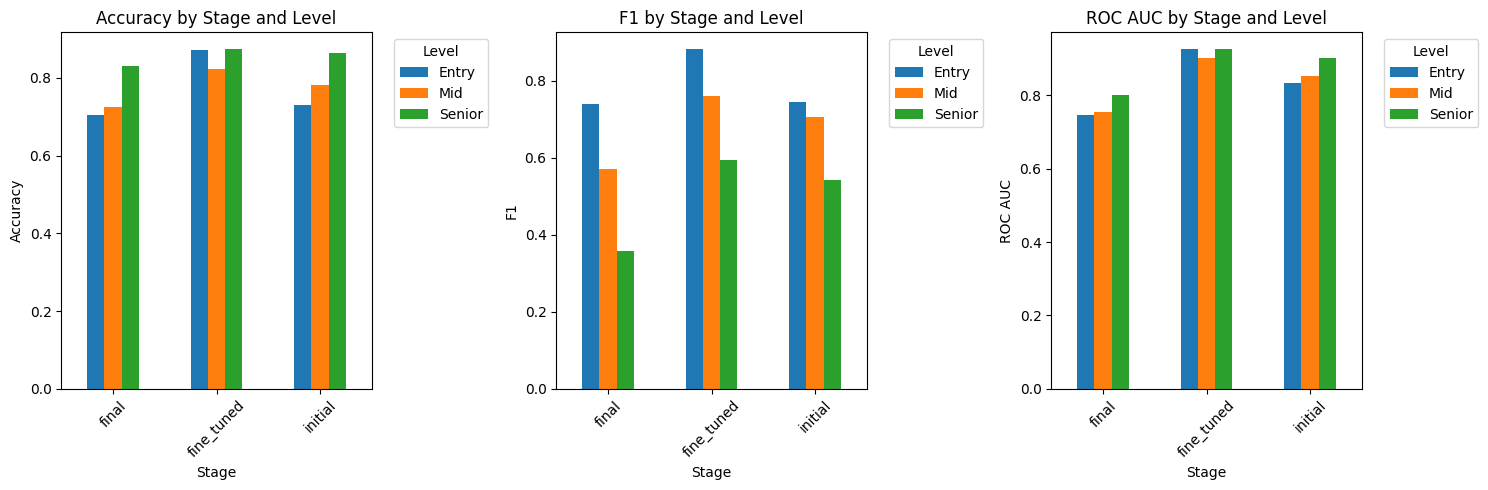

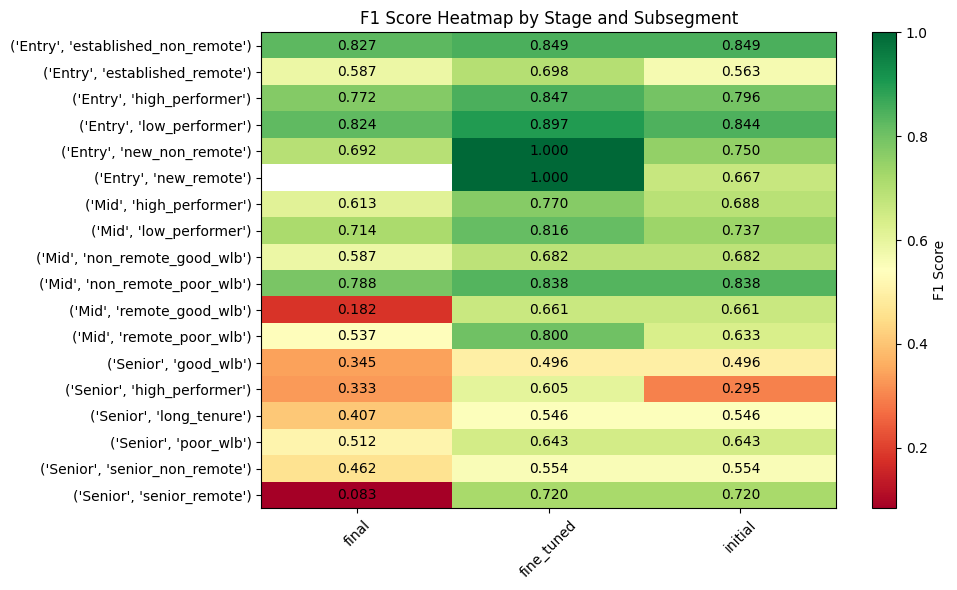

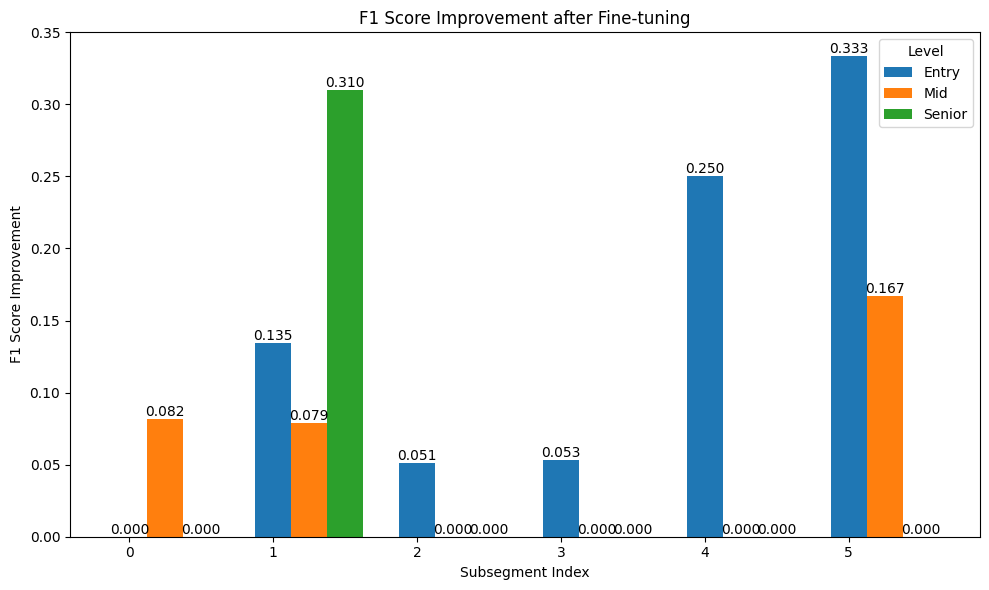

In [164]:
def create_summary_report(results_dict):
    """
    Create summary tables, executive summary, and visualizations comparing all stages
    """
    print("\n" + "="*80)
    print("EXECUTIVE SUMMARY")
    print("="*80)
    
    # Create summary DataFrame
    summary_data = []
    for stage, stage_results in results_dict.items():
        for level, level_results in stage_results.items():
            for subseg_name, subseg_data in level_results.items():
                metrics = subseg_data['metrics']
                summary_data.append({
                    'Stage': stage,
                    'Level': level,
                    'Subsegment': subseg_name,
                    'Size': subseg_data['size'],
                    'Accuracy': metrics['accuracy'],
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1': metrics['f1'],
                    'ROC AUC': metrics['roc_auc']
                })
    
    summary_df = pd.DataFrame(summary_data)
    
    # 1. Executive Summary Text
    print("\nKey Findings:")
    for level in ['Entry', 'Mid', 'Senior']:
        level_data = summary_df[summary_df['Level'] == level]
        if not level_data.empty:
            print(f"\n{level} Level:")
            print(f"- Average Accuracy: {level_data['Accuracy'].mean():.3f}")
            print(f"- Best performing subsegment: {level_data.loc[level_data['F1'].idxmax(), 'Subsegment']}")
            
            # Calculate improvement only if both stages exist
            if {'initial', 'fine_tuned'}.issubset(level_data['Stage'].unique()):
                improvement = level_data[level_data['Stage'] == 'fine_tuned']['F1'].mean() - \
                            level_data[level_data['Stage'] == 'initial']['F1'].mean()
                print(f"- Average improvement after fine-tuning: {improvement:.3f}")
    
    # 2. Create Summary Tables
    print("\n" + "="*80)
    print("PERFORMANCE SUMMARY TABLES")
    print("="*80)
    
    # Average metrics by stage and level
    stage_level_summary = summary_df.groupby(['Stage', 'Level']).agg({
        'Accuracy': 'mean',
        'Precision': 'mean',
        'Recall': 'mean',
        'F1': 'mean',
        'ROC AUC': 'mean'
    }).round(3)
    
    print("\nAverage Metrics by Stage and Level:")
    print(stage_level_summary)
    
    # 3. Create Visualizations
    # Plot 1: Performance Comparison
    plt.figure(figsize=(15, 5))
    metrics_to_plot = ['Accuracy', 'F1', 'ROC AUC']
    
    for i, metric in enumerate(metrics_to_plot, 1):
        plt.subplot(1, 3, i)
        
        # Calculate mean values for each stage and level
        plot_data = summary_df.pivot_table(
            values=metric,
            index='Stage',
            columns='Level',
            aggfunc='mean'
        )
        
        # Create bar plot
        plot_data.plot(kind='bar', ax=plt.gca())
        plt.title(f'{metric} by Stage and Level')
        plt.xlabel('Stage')
        plt.ylabel(metric)
        plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Performance Heatmap
    plt.figure(figsize=(10, 6))
    
    # Create heatmap data
    heatmap_data = summary_df.pivot_table(
        values='F1',
        index=['Level', 'Subsegment'],
        columns='Stage',
        aggfunc='mean'
    )
    
    # Plot heatmap
    plt.imshow(heatmap_data.values, aspect='auto', cmap='RdYlGn')
    plt.colorbar(label='F1 Score')
    
    # Add labels
    plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
    
    # Add annotations
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            value = heatmap_data.values[i, j]
            if not np.isnan(value):
                plt.text(j, i, f'{value:.3f}', ha='center', va='center')
    
    plt.title('F1 Score Heatmap by Stage and Subsegment')
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Improvement Analysis
    if {'initial', 'fine_tuned'}.issubset(summary_df['Stage'].unique()):
        plt.figure(figsize=(10, 6))
        
        # Calculate improvements
        improvements = summary_df.pivot_table(
            values='F1',
            index=['Level', 'Subsegment'],
            columns='Stage'
        ).reset_index()
        
        improvements['Improvement'] = improvements['fine_tuned'] - improvements['initial']
        
        # Plot improvements by level
        for level in improvements['Level'].unique():
            level_data = improvements[improvements['Level'] == level]
            x_pos = np.arange(len(level_data))
            plt.bar(x_pos + (list(improvements['Level'].unique()).index(level) * 0.25),
                   level_data['Improvement'],
                   width=0.25,
                   label=level)
            
            # Add value labels
            for i, v in enumerate(level_data['Improvement']):
                plt.text(x_pos[i] + (list(improvements['Level'].unique()).index(level) * 0.25),
                        v,
                        f'{v:.3f}',
                        ha='center',
                        va='bottom')
        
        plt.xlabel('Subsegment Index')
        plt.ylabel('F1 Score Improvement')
        plt.title('F1 Score Improvement after Fine-tuning')
        plt.legend(title='Level')
        plt.tight_layout()
        plt.show()
    
    return summary_df

summary_df = create_summary_report(results)